In [1]:
# 3 types of ML
# * Supervised
# * Unsupervised
# * Re-enforcement learning

# Unsupervised just has features, no class label, we try to understand the underlying structure of the data 
# or the clusters in the data to make useful predictions

In [ ]:
# Elbow Method

# Start with a k value, say k = 2
#     - You sum up the Sum of Squared Errors that was calculated for each point, 
#         - this is the distance from the point to the centroid
#     - Calculate SSE for all clusters and sum them up
#     - Now you can plotit where the y-axis is the SSE
#         - Increased clusters gives you a decreased SSE

In [36]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("./income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


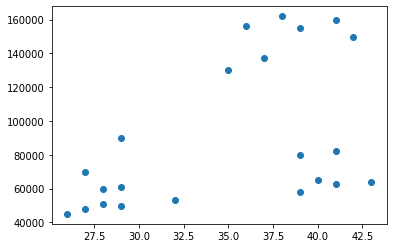

In [8]:
plt.scatter(df['Age'], df['Income($)'])

In [9]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# We will exclude name column, because it is a String
y_predicted = km.fit_predict(df[['Age','Income($)']])

# The numbers correlate to the cluster the data point is located in
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [41]:
#df = df.drop(columns=['clsuter'])

df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


No handles with labels found to put in legend.


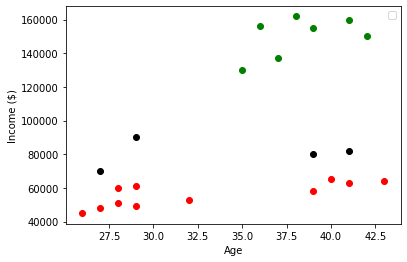

In [23]:
#Split clusters into 3 individual df's

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
#################################################
### Should I be scaling?
#################################################

# Tries to make scale 0 to 1

scaler = MinMaxScaler()

# Scales income column, meaning it wont allow any values outside the range of 0-1
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [39]:
#################################################
### Now train our scaled dataset
#################################################

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [42]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


No handles with labels found to put in legend.


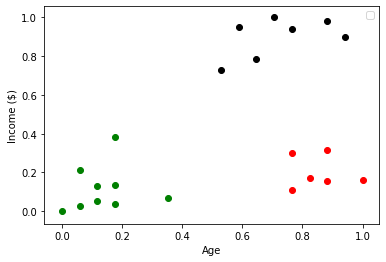

In [43]:
#Split clusters into 3 individual df's

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [44]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

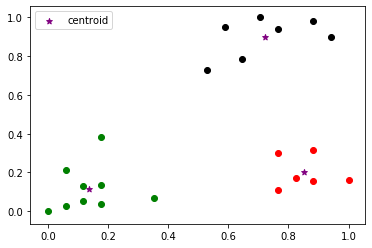

In [45]:
#Split clusters into 3 individual df's

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid') # x is first column, y is second
plt.legend()

In [46]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']]) # Doing this to exclude name column, could just create new df w/o it
    
    ### SSE
    # When you call .fit() on KMeans there is a parametercalled inertia that gives you the SSE
    
    sse.append(km.inertia_)

In [47]:
sse

[5.434011511984241,
 2.0911363886892635,
 0.4750783498520275,
 0.3491047094404181,
 0.2755825568705174,
 0.21552563314935758,
 0.18122153830265225,
 0.13276619319719038,
 0.101887877250499]

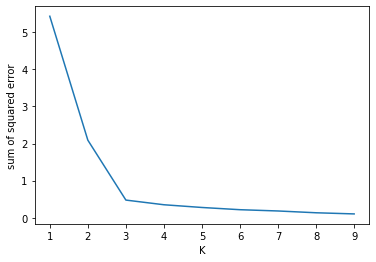

In [48]:
# Elbow is at K = 3

plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)